# QUESTION
At a post office, customers enter a single line waiting to be served by any one
of two clerks.  Every minute there is a 60% chance that a new customer arrives.
If there is no one in line and a server is free, the customer does not wait to be
served.  When a customer is being served there is a 25% chance every minute that
they complete their business and leave.  When the clerk is free he will take the
next customer in line, in the order that they arrived.  Every minute, there is a
5% chance that a person standing in line will give up and leave.  The post office
is always open (24/7/365). Note: For simplicity you can assume customers will
always arrive at the beginning of the minute and if they leave they do so at the
end of the minute.

In [1]:
# Import modules
import random as rand
import matplotlib.pyplot as plt

In [29]:
# Hyper Parameters
#INT = 10  #small test interval used for QC
INT = 1 * 60 * 24 * 365 #Total time to track in Minutes
NumClerk = 2    #Number of clerks
p_new = 60      #Probability a new person shows up
p_ready = 25    #Probability a person being served, completes business and leaves
p_leave = 5     #Probability a person in line leaves

In [30]:
# =============================================================================
# #% INITIALIZATION
# =============================================================================
slots = [0]*NumClerk    #slots representing number of clerks
waitTime = 0            #total wait time of all customers
queue = 0               #number of people in queue
leave = 0               #number of people that left
idle = 0                #number of minutes that clerks are idle
cust = 0                #number of customers
doneBusy = 0            #number of customers done from business
finalQueue = []         #list for final queue
finalLeave = []         #list for cust leaving
finalDoneBusiness = []  #list for customers done from business

# =============================================================================
# MAIN LOOP
# =============================================================================
for tt in range(INT):
    #CHECK IF ANYONE IS DONE FROM BUSINESS AND LEAVES FROM THE CLERKS
    for jj in range(NumClerk):
        if slots[jj] == 1:
            if rand.randint(0,100) < p_ready + 1:
                slots[jj] = 0
                doneBusy += 1
            else:
                waitTime += 1
        #CHECK IF A NEW PERSON WALKS IN POST OFFICE AND IS ADDED TO THE QUEUE
        if rand.randint(0,100) < p_new + 1:
            cust += 1
            queue += 1
        #CHECK IF A PERSON RANDOMLY LEAVES THE QUEUE
        if queue > 0 and rand.randint(0,100) < p_leave + 1:
            queue -= 1
            leave += 1
        #CHECK IF A PERSON FROM QUEUE CAN BE SERVED
        for jj in range(0,NumClerk):
            #CHECK IF CLERK IS FREE
            if slots[jj] == 0:
                #CHECK IF PERSON IS IN QUEUE
                if queue > 0:
                    slots[jj] = 1
                    queue += - 1
        #EVERYONE LEFT IN THE QUEUE HAS WAITED ONE MORE INTERVAL TO BE SERVED
        waitTime += queue
        #COUNT THE NUMBER OF TIMES THE CLERKS WERE IDLE
        for jj in range(0,NumClerk):
            if slots[jj] == 0:
                idle += 1
    # Lists for plots
    finalQueue.append(queue)   
    finalLeave.append(leave)
    finalDoneBusiness.append(doneBusy)

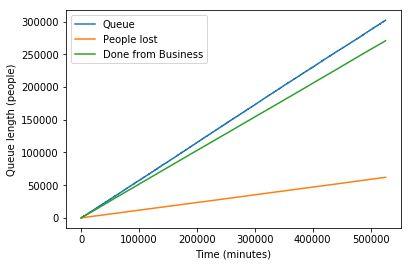

In [31]:
# =============================================================================
# PLOT ILLUSTRATING THE QUEUE LENGTH
# =============================================================================
plt.plot(range(INT),finalQueue,label='Queue')
plt.plot(range(INT),finalLeave,label='People lost')
plt.plot(range(INT),finalDoneBusiness, label='Done from Business')
plt.xlabel('Time (minutes)')
plt.ylabel('Queue length (people)')
plt.legend()
plt.show()

In [32]:
# =============================================================================
# QUESTIONS
# =============================================================================
# What is the average amount of time a customer spends in the post office (including those not SERVED)?
AVG_TIME_CUSTOMER = waitTime / cust
print('1) Average time spent in post office is {:0.2f} minutes.'.format(AVG_TIME_CUSTOMER))
# What percentage of customers leave without being served?
PERCENT_CUSTOMERS_LEAVE = leave / cust * 100
print('2) {:0.2f}% of the customers leave without being served.'.format(PERCENT_CUSTOMERS_LEAVE))
# What percentage of time are the clerks idle?
PERCENT_CLERKS_IDLE = idle / (NumClerk * INT) * 100
print('3) Clerks are {:0.2f}% of the time idle.'.format(PERCENT_CLERKS_IDLE))

1) Average time spent in post office is 250513.16 minutes.
2) 9.78% of the customers leave without being served.
3) Clerks are 0.00% of the time idle.
